/tmp/ipython-input-2007574136.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(), inplace=True)


MSE: 6.266115569116481
RMSE: 2.5032210388050995
R2 Score: 0.646907020740291


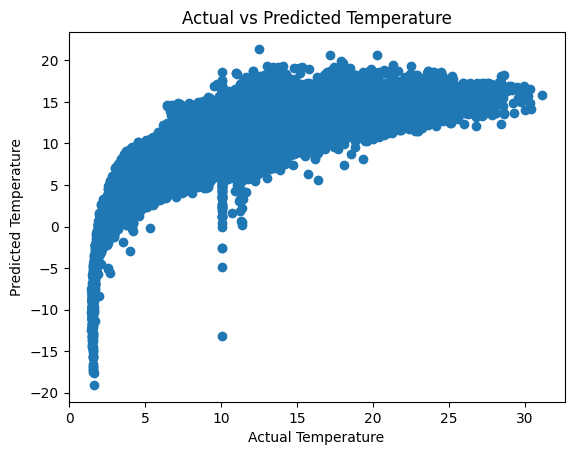

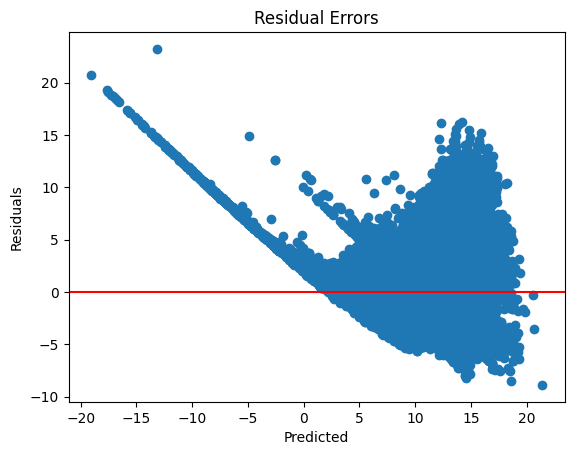

Lasso(alpha=0.01)

In [5]:
# Name    : Navithanjali
# Roll No : 24BAD077

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
#from google.colab import files

#uploaded = files.upload()

# Load dataset
#df = pd.read_csv("bottle.csv.zip")

# Select features and target
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'


data = df[features + [target]]

# Handle missing values
data.fillna(data.median(), inplace=True)

X = data[features]
y = data[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Errors")
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Saving LICI - 10 minute data.csv to LICI - 10 minute data (4).csv
                        date    open    high    low   close    volume
0  2022-05-17 09:35:00+05:30  872.00  872.00  872.0  872.00   3759243
1  2022-05-17 09:45:00+05:30  872.00  872.00  872.0  872.00         0
2  2022-05-17 09:55:00+05:30  872.00  918.10  862.0  902.80  12449251
3  2022-05-17 10:05:00+05:30  902.45  908.95  896.0  902.15   5237329
4  2022-05-17 10:15:00+05:30  902.30  905.00  900.0  903.85   1820317
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594

Confusion Matrix:
[[443   0]
 [285   9]]


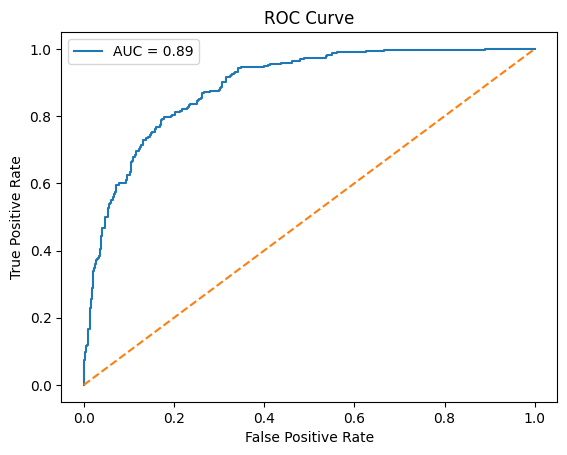


Feature Importance:
high      4.100663
low       2.301069
volume   -0.019189
open     -6.396031
dtype: float64


In [11]:
# ============================================================
# EXPERIMENT NO: 2
# REGRESSION AND OPTIMIZATION
# SCENARIO 2: LOGISTIC REGRESSION (LIC STOCK PRICE)
#
# Name      : Navithanjali .M.S
# Roll No   : 24BAD077
# Date      : 30-01-2026
# ============================================================

# -----------------------------
# Upload dataset manually
# -----------------------------
from google.colab import files
uploaded = files.upload()

# -----------------------------
# Import required libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("LICI - 10 minute data.csv")   # exact filename

# Preview dataset
print(df.head())
print(df.columns)

# -----------------------------
# Create target variable
# -----------------------------
# 1 -> Closing price > Opening price
# 0 -> Closing price <= Opening price
df['Price_Movement'] = np.where(df['close'] > df['open'], 1, 0)

# -----------------------------
# Select features and target
# -----------------------------
features = ['open', 'high', 'low', 'volume']
X = df[features].copy()
y = df['Price_Movement']

# -----------------------------
# Handle missing values
# -----------------------------
X.fillna(X.mean(), inplace=True)

# -----------------------------
# Feature scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Logistic Regression model
# -----------------------------
model = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation metrics
# -----------------------------
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -----------------------------
# ROC Curve
# -----------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -----------------------------
# Feature importance
# -----------------------------
importance = pd.Series(
    model.coef_[0],
    index=features
).sort_values(ascending=False)

print("\nFeature Importance:")
print(importance)

